# Project 1 Starter Notebook

This notebook is meant to help you start up easily.
It will assume you have downloaded the relevant data.
For more information about the competition, refer to the kaggle pages.

Let's load in and inspect all data first:

In [919]:
import pandas as pd
import numpy as np

# read in data
bicycle_data = pd.read_csv("input/bicycle-counter-prediction/train_data.csv")
bicycle_data.head()

,Date_hour,Totaal
0,2023-01-01T00,111.0
1,2023-01-01T01,201.0
2,2023-01-01T02,170.0
3,2023-01-01T03,144.0
4,2023-01-01T04,155.0


In [920]:
test_data = pd.read_csv("input/bicycle-counter-prediction/test_data.csv")
test_data.head()

,Id,Date_hour
0,0,2023-07-01T00
1,1,2023-07-01T01
2,2,2023-07-01T02
3,3,2023-07-01T03
4,4,2023-07-01T04


In [921]:
bicycle_data_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2022-gent.csv", sep = ";")
bicycle_data_2022.head()

,﻿Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
0,COU,Coupure-Links,2022-01-01,0:00:00,2022-01-01T00:00:00+01:00,0,0,0
1,COU,Coupure-Links,2022-01-01,0:05:00,2022-01-01T00:05:00+01:00,2,1,1
2,COU,Coupure-Links,2022-01-01,0:10:00,2022-01-01T00:10:00+01:00,1,0,1
3,COU,Coupure-Links,2022-01-01,0:15:00,2022-01-01T00:15:00+01:00,0,0,0
4,COU,Coupure-Links,2022-01-01,0:20:00,2022-01-01T00:20:00+01:00,2,0,2


In [922]:
bicycle_data_2022["Date_hour"] = bicycle_data_2022['Ordening'].str.extract(r'^(.*?T\d{2})..')
bicycle_data_2022 = bicycle_data_2022.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal_2022')
bicycle_data_2022.head()

,Datum,Date_hour,Totaal_2022
0,2022-01-01,2022-01-01T00,30
1,2022-01-01,2022-01-01T01,110
2,2022-01-01,2022-01-01T02,117
3,2022-01-01,2022-01-01T03,148
4,2022-01-01,2022-01-01T04,150


In [923]:
bicycle_data_2021 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2021-gent.csv", sep = ";")
bicycle_data_2021.head()

,﻿Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
0,COU,Coupure-Links,2021-03-01,0:00:00,2021-03-01T00:00:00+01:00,2,2,0
1,COU,Coupure-Links,2021-03-01,0:05:00,2021-03-01T00:05:00+01:00,1,0,1
2,COU,Coupure-Links,2021-03-01,0:10:00,2021-03-01T00:10:00+01:00,1,1,0
3,COU,Coupure-Links,2021-03-01,0:15:00,2021-03-01T00:15:00+01:00,0,0,0
4,COU,Coupure-Links,2021-03-01,0:20:00,2021-03-01T00:20:00+01:00,0,0,0


In [924]:
bicycle_data_2021["Date_hour"] = bicycle_data_2021['Ordening'].str.extract(r'^(.*?T\d{2})..')
bicycle_data_2021 = bicycle_data_2021.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal_2021')
bicycle_data_2021.head()

,Datum,Date_hour,Totaal_2021
0,2021-03-01,2021-03-01T00,5
1,2021-03-01,2021-03-01T01,1
2,2021-03-01,2021-03-01T02,0
3,2021-03-01,2021-03-01T03,2
4,2021-03-01,2021-03-01T04,21


In [925]:
# read in data
weather_rawdata = pd.read_csv("input/bicycle-counter-prediction/open-meteo-51.10N3.70E13m.csv", skiprows=2)
print(weather_rawdata.shape)
weather_rawdata.head()

(6624, 7)


,time,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),is_day ()
0,2023-01-01T00:00,15.8,9.3,0.0,3.0,86.0,0
1,2023-01-01T01:00,15.3,8.9,0.0,3.0,80.0,0
2,2023-01-01T02:00,14.7,8.8,0.0,2.0,70.0,0
3,2023-01-01T03:00,14.3,9.0,0.0,3.0,99.0,0
4,2023-01-01T04:00,13.8,9.3,0.0,2.0,70.0,0


In [926]:
school_holidays_data = pd.read_csv("input/bicycle-counter-prediction/school_holidays.csv", sep = ";")
school_holidays_data.head()

,name,start,end
0,Christmas holiday 2022,2022-12-26,2023-01-08
1,Spring break 2023,2023-02-20,2023-02-26
2,Easter holiday 2023,2023-04-03,2023-04-16
3,Summer holiday 2023,2023-07-01,2023-08-31
4,Autumn break 2023,2023-10-30,2023-11-05


In [927]:
import datetime
school_holidays = {}
for index, row in school_holidays_data.iterrows():
    school_holidays[row['name']] = [datetime.datetime.strptime(row['start'], '%Y-%m-%d'), datetime.datetime.strptime(row['end'], '%Y-%m-%d')]

The weather data downloaded from open meteo carries times in a slightly different format than the bicycle counter data.
Note that you are encouraged to create and download your own weather data with more features.
The following code converts this data:

In [928]:
import holidays
from datetime import timedelta

weather_data = weather_rawdata.copy()
weather_data.columns = weather_data.columns.str.split(' ').str[0]
weather_data["Date_hour"] = weather_data["time"].str.split(':', expand = True)[0]
weather_data = weather_data.drop("time", axis = 1)
date_time = pd.to_datetime(weather_data['Date_hour'])
weather_data['weekday'] = date_time.dt.strftime('%A')
weather_data['hour'] = date_time.dt.hour
weather_data['is_school_hours'] = ((date_time.dt.hour >= 8) & (date_time.dt.hour <= 17)).astype(int)
weather_data['is_weekend'] = (weather_data['weekday'].isin(["Saturday", "Sunday"])).astype(int)
belgian_holidays = holidays.Belgium(years=2023)
weather_data['is_public_holiday'] = (date_time.dt.date.isin(belgian_holidays)).astype(int)
weather_data['next_day'] = date_time + timedelta(days=1)
weather_data['prev_day'] = date_time - timedelta(days=1)
weather_data['is_bridge_day'] = (weather_data['weekday'].isin(["Monday", "Friday"]) & weather_data['next_day'].dt.date.isin(belgian_holidays) | weather_data['prev_day'].dt.date.isin(belgian_holidays)).astype(int)
is_school_holiday = [0] * len(date_time)
for i, check_date in enumerate(date_time):
    for holiday, date_range in school_holidays.items():
        start_date = date_range[0]
        end_date = date_range[1]
        if start_date <= check_date <= end_date:
            is_school_holiday[i] = 1
weather_data["is_school_holiday"] = is_school_holiday
weather_data["date"] = date_time.dt.date
averages = weather_data.groupby('date')['temperature_2m'].mean().reset_index(name ='mean_temperature_2m')
weather_data = weather_data.merge(averages, on = "date", how = 'left')
weather_data["month"] = date_time.dt.month
weather_data['hour_sin'] = np.sin(2 * np.pi * weather_data['hour'] / 24)
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
weather_data['season'] = weather_data['date'].apply(get_season)
weather_data['Totaal_2022'] = bicycle_data_2022['Totaal_2022']
weather_data['Totaal_2021'] = bicycle_data_2021['Totaal_2021']
weather_data['Totaal_mean_historic'] = weather_data[['Totaal_2022', 'Totaal_2021']].mean(axis = 1)

print(weather_data.shape)
weather_data.head()

(6624, 24)


,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,is_bridge_day,is_school_holiday,date,mean_temperature_2m,month,hour_sin,season,Totaal_2022,Totaal_2021,Totaal_mean_historic
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,...,0,1,2023-01-01,12.9125,1,0.000000,Winter,30,5,17.5
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,...,0,1,2023-01-01,12.9125,1,0.258819,Winter,110,1,55.5
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,...,0,1,2023-01-01,12.9125,1,0.500000,Winter,117,0,58.5
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,...,0,1,2023-01-01,12.9125,1,0.707107,Winter,148,2,75.0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,...,0,1,2023-01-01,12.9125,1,0.866025,Winter,150,21,85.5


In [929]:

dummies = pd.concat([pd.get_dummies(weather_data.weekday), pd.get_dummies(weather_data.season)], axis = 1)
dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1


In [930]:
weather_data = pd.concat([weather_data, dummies], axis=1)
weather_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,...,0,0,1,0,0,0,0,0,0,1
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,...,0,0,1,0,0,0,0,0,0,1
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,...,0,0,1,0,0,0,0,0,0,1
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,...,0,0,1,0,0,0,0,0,0,1
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,...,0,0,1,0,0,0,0,0,0,1


The following code merges the bicycle data with the weather data to get a train set:

In [931]:
train_data = weather_data.merge(bicycle_data, on = "Date_hour")
train_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Totaal
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,...,0,1,0,0,0,0,0,0,1,111.0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,...,0,1,0,0,0,0,0,0,1,201.0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,...,0,1,0,0,0,0,0,0,1,170.0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,...,0,1,0,0,0,0,0,0,1,144.0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,...,0,1,0,0,0,0,0,0,1,155.0


The following does the same but then for the test set:

In [932]:
test_data = weather_data.merge(test_data, on = "Date_hour")
test_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Id
0,18.0,15.7,0.0,3.0,100.0,0,2023-07-01T00,Saturday,0,0,...,1,0,0,0,0,0,0,1,0,0
1,17.7,15.3,0.0,3.0,100.0,0,2023-07-01T01,Saturday,1,0,...,1,0,0,0,0,0,0,1,0,1
2,17.4,15.0,0.0,3.0,100.0,0,2023-07-01T02,Saturday,2,0,...,1,0,0,0,0,0,0,1,0,2
3,17.2,15.0,0.0,3.0,100.0,0,2023-07-01T03,Saturday,3,0,...,1,0,0,0,0,0,0,1,0,3
4,17.1,15.3,0.0,3.0,100.0,1,2023-07-01T04,Saturday,4,0,...,1,0,0,0,0,0,0,1,0,4


In [933]:
ground_truth = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2023-gent.csv", sep = ";")
ground_truth.head()

,﻿Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
0,COU,Coupure-Links,2023-01-01,0:00:00,2023-01-01T00:00:00+01:00,7.0,4.0,3.0
1,COU,Coupure-Links,2023-01-01,0:05:00,2023-01-01T00:05:00+01:00,2.0,0.0,2.0
2,COU,Coupure-Links,2023-01-01,0:10:00,2023-01-01T00:10:00+01:00,1.0,0.0,1.0
3,COU,Coupure-Links,2023-01-01,0:15:00,2023-01-01T00:15:00+01:00,8.0,4.0,4.0
4,COU,Coupure-Links,2023-01-01,0:20:00,2023-01-01T00:20:00+01:00,5.0,2.0,3.0


In [934]:
gold_data = ground_truth.copy()
gold_data["Date_hour"] = ground_truth['Ordening'].str.extract(r'^(.*?T\d{2})..')
gold_data = gold_data.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal')
gold_data = weather_data.merge(gold_data, on = "Date_hour")
gold_data['Totaal_2022'] = bicycle_data_2022['Totaal_2022']
gold_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Datum,Totaal
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,...,1,0,0,0,0,0,0,1,2023-01-01,111.0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,...,1,0,0,0,0,0,0,1,2023-01-01,201.0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,...,1,0,0,0,0,0,0,1,2023-01-01,170.0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,...,1,0,0,0,0,0,0,1,2023-01-01,144.0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,...,1,0,0,0,0,0,0,1,2023-01-01,155.0


In [935]:
gtest_data = gold_data[(gold_data['Datum'] >= '2023-07-01') & (gold_data['Datum'] <= '2023-07-31')]
gtest_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Datum,Totaal
4343,18.0,15.7,0.0,3.0,100.0,0,2023-07-01T00,Saturday,0,0,...,0,0,0,0,0,0,1,0,2023-07-01,150.0
4344,17.7,15.3,0.0,3.0,100.0,0,2023-07-01T01,Saturday,1,0,...,0,0,0,0,0,0,1,0,2023-07-01,92.0
4345,17.4,15.0,0.0,3.0,100.0,0,2023-07-01T02,Saturday,2,0,...,0,0,0,0,0,0,1,0,2023-07-01,49.0
4346,17.2,15.0,0.0,3.0,100.0,0,2023-07-01T03,Saturday,3,0,...,0,0,0,0,0,0,1,0,2023-07-01,36.0
4347,17.1,15.3,0.0,3.0,100.0,1,2023-07-01T04,Saturday,4,0,...,0,0,0,0,0,0,1,0,2023-07-01,57.0


## Models

### Feature Selection

In [936]:
X = gold_data.loc[:, gold_data.columns != "Totaal"].select_dtypes(include=np.number)
y = gold_data["Totaal"]

#### Select K best

In [937]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import r_regression

SKB = SelectKBest(r_regression, k=4)
SKB.fit(X, y)
selected_feature_indices = SKB.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

print(selected_feature_names)

['is_school_hours', 'Totaal_2022', 'Totaal_2021', 'Totaal_mean_historic']


In [938]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
season = ["Winter", "Fall", "Spring", "Summer"]
features = ['temperature_2m', 'is_day', 'is_weekend', 'hour_sin', 'is_public_holiday', 'is_school_holiday', 'is_bridge_day', 'is_school_hours', 'Totaal_2022']
#features = selected_feature_names

y_train = train_data["Totaal"]
X_train = train_data.loc[:, features]

y_test = gtest_data["Totaal"]
X_test = gtest_data.loc[:, features]

#y_train = gold_data["Totaal"]
#X_train = gold_data.loc[:, features

### Preprocessing

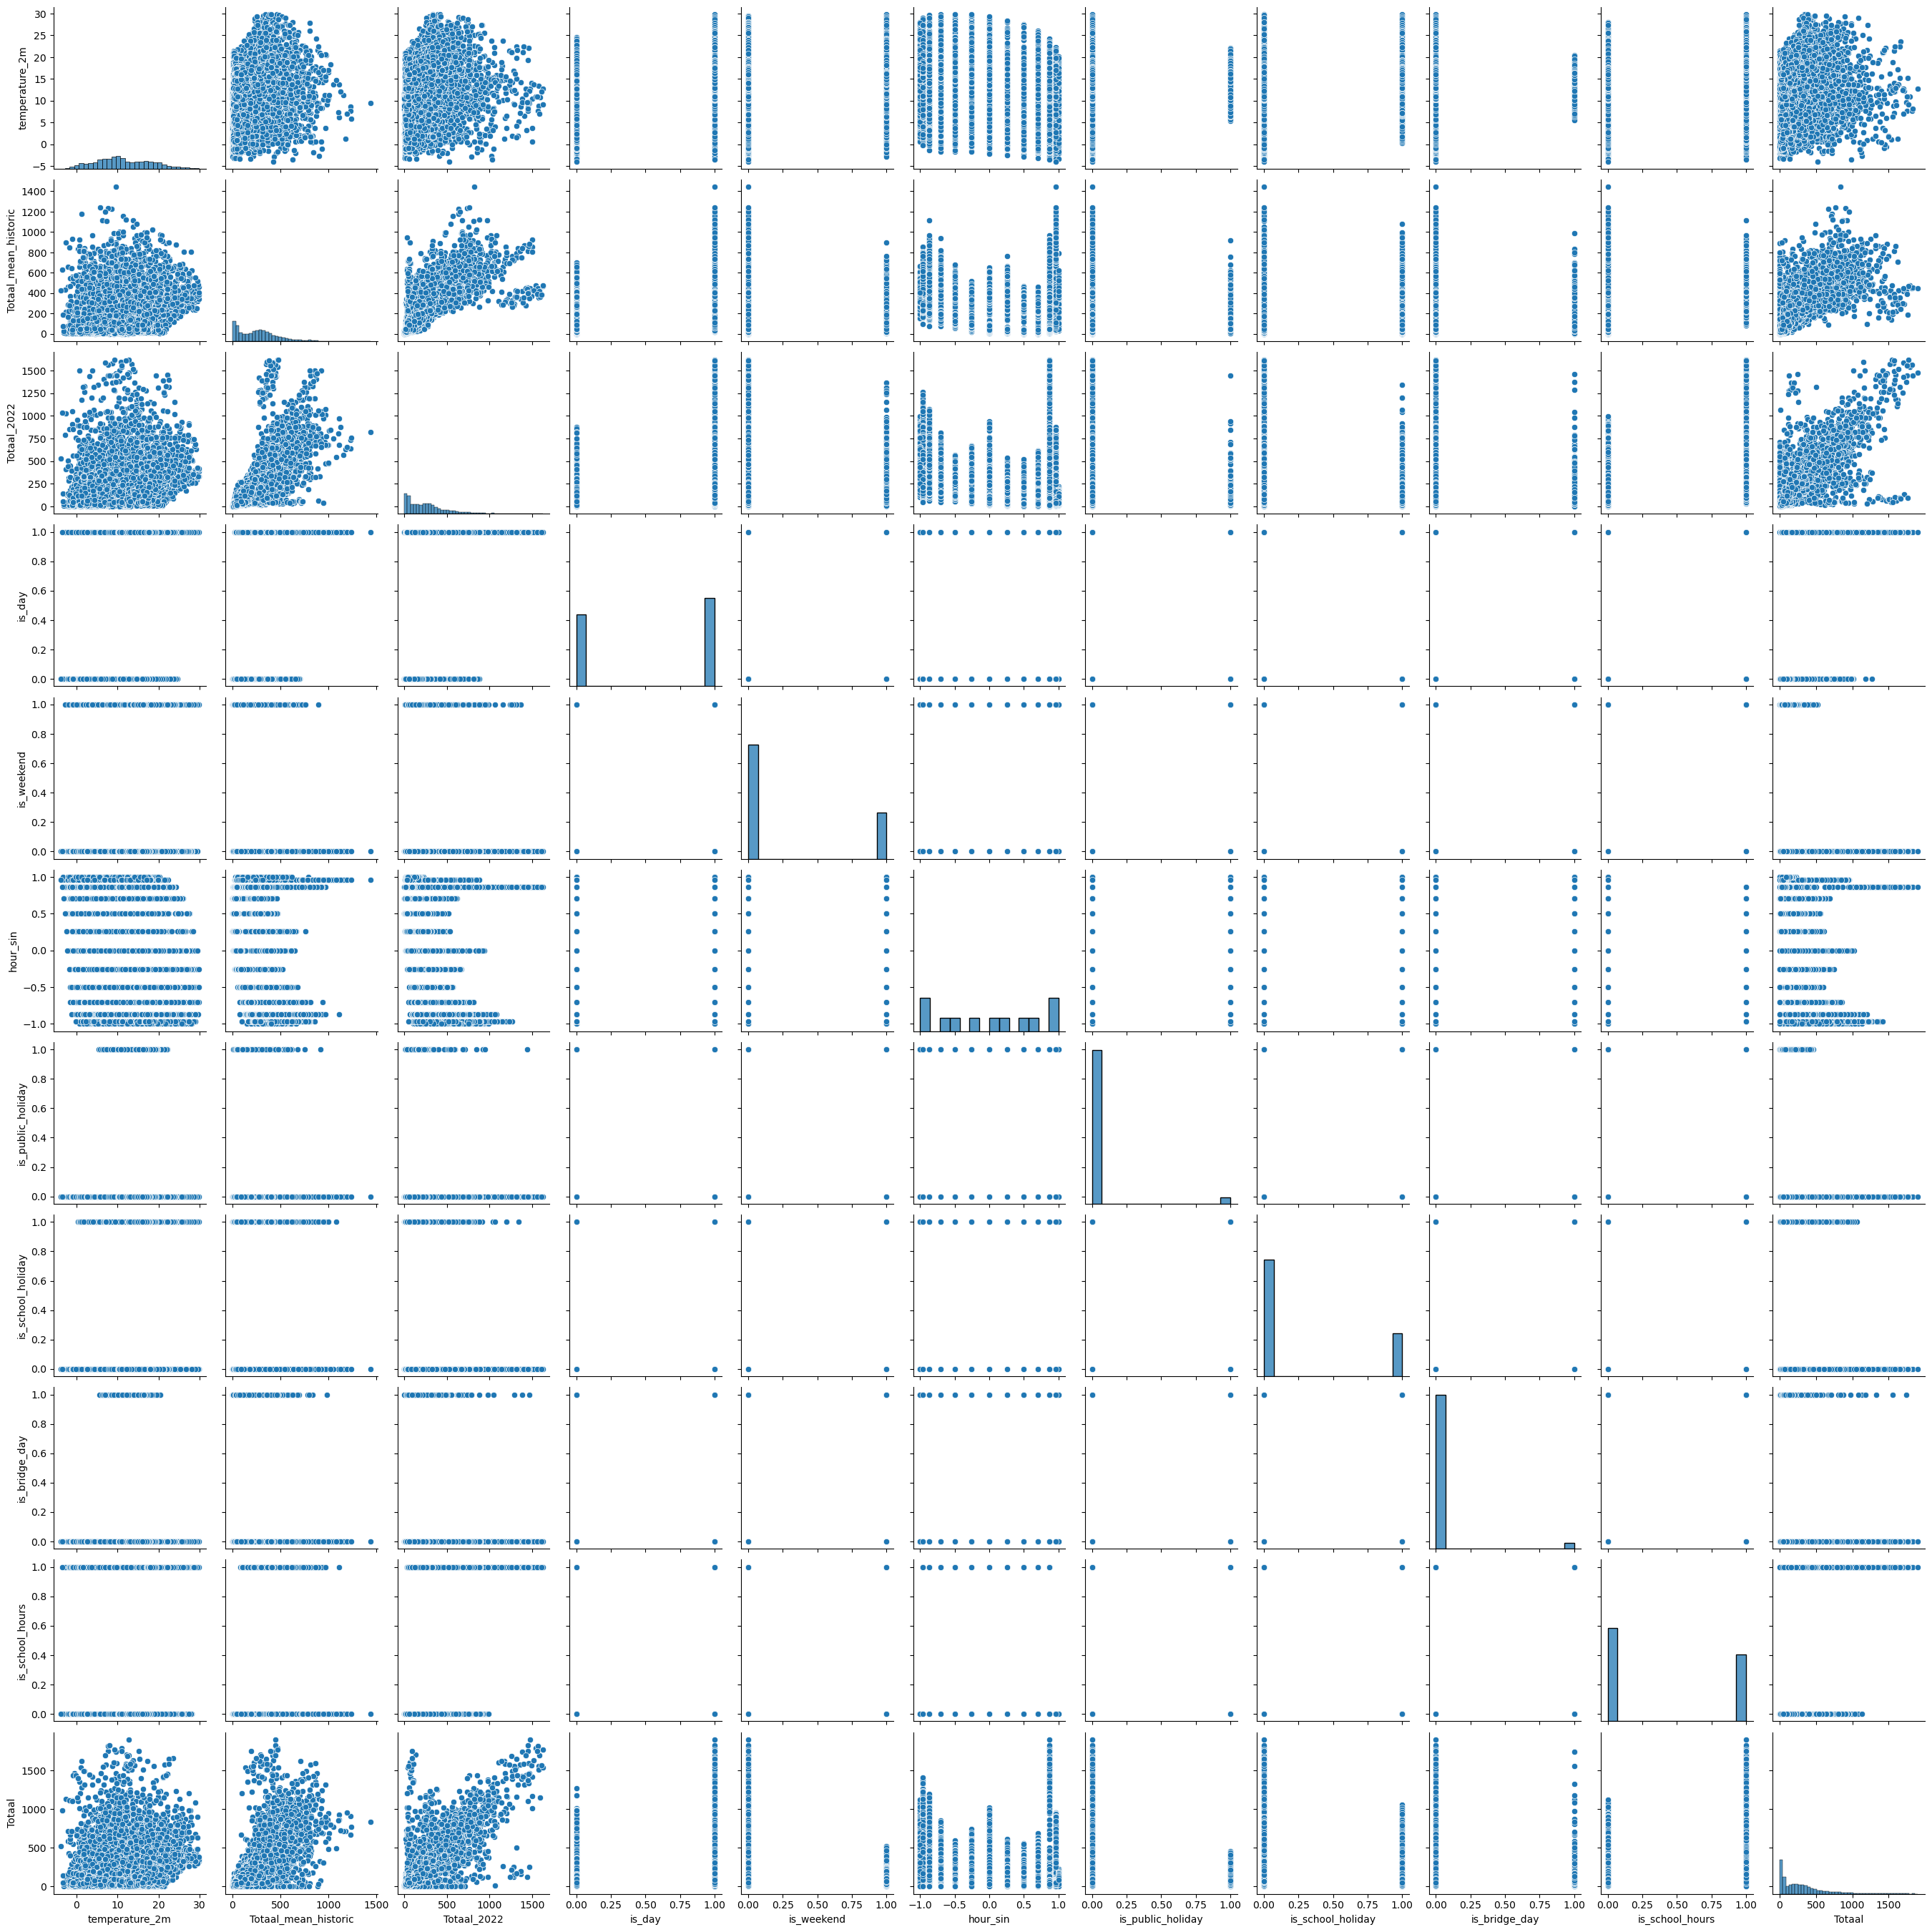

In [869]:
import seaborn as sns

plot_features = ['temperature_2m', 'Totaal_2022', 'is_day', 'is_weekend', 'hour_sin', 'is_public_holiday', 'is_school_holiday', 'is_bridge_day', 'is_school_hours']
sns.pairplot(gold_data.loc[:,plot_features + ['Totaal']])

In [781]:
# Function to compute MSE
def compute_MSE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return(np.mean((y_true-y_predicted)**2))

### Linear Regression

In [916]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

LinReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), LinearRegression()) # call an instance of the class LinearRegression

LinReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LinReg.predict(X_train) # predict training data

y_hat_test = LinReg.predict(X_test) # predict test data

R_train = LinReg.score(X_train, y_train) # Training set R²
R_test = LinReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

formula = 'Totaal ~ ' + '+'.join(features)

model = smf.ols(formula=formula, 
                data=train_data).fit()
  
# model summary 
print(model.summary()) 


Train set R²: 0.44745594046486614
Test set R²: 0.47685167308267284
                            OLS Regression Results                            
Dep. Variable:                 Totaal   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     1171.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:00:41   Log-Likelihood:                -29898.
No. Observations:                4343   AIC:                         5.980e+04
Df Residuals:                    4339   BIC:                         5.983e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

d:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.204e+05, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


### Poisson Regression

In [917]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

PoiReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), PoissonRegressor(alpha = 100,
                                                                                    solver = "lbfgs",
                                                                                    tol = 1e-4
                                                                                    )) # call an instance of the class LinearRegression

PoiReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = PoiReg.predict(X_train) # predict training data

y_hat_test = PoiReg.predict(X_test) # predict test data

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.39011742142369044
Test set R²: 0.34723228945354323


d:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.204e+05, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


### Negative binomial regression

In [785]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = 'Totaal ~ temperature_2m * is_day * hour_sin + is_weekend + is_public_holiday + is_bridge_day + is_school_holiday + is_school_hours + Totaal_2022'

# Create the model
NBReg = smf.glm(formula=formula, data=train_data, family=sm.families.NegativeBinomial())

results = NBReg.fit()

y_hat_train = results.predict(X_train) # predict training data

y_hat_test = results.predict(X_test) # predict test data

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

print(results.summary())


Train set R²: 0.42988103769716357
Test set R²: 0.5436356116954788
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Totaal   No. Observations:                 4343
Model:                            GLM   Df Residuals:                     4329
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27532.
Date:                Tue, 10 Oct 2023   Deviance:                       5535.6
Time:                        17:45:51   Pearson chi2:                 3.66e+03
No. Iterations:                    15   Pseudo R-squ. (CS):             0.5323
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

### Tweedie Regression

In [792]:
from sklearn.linear_model import TweedieRegressor

TweReg = make_pipeline(StandardScaler(), TweedieRegressor(power = 0, 
                                                          alpha = 0.4)) # call an instance of the class LinearRegression

TweReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = TweReg.predict(X_train) # predict training data

y_hat_test = TweReg.predict(X_test) # predict test data

R_train = TweReg.score(X_train, y_train) # Training set R²
R_test = TweReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.5099358918598449
Test set R²: 0.6741468859970807


### Ridge Regression

In [793]:
from sklearn.linear_model import Ridge 

RidReg = make_pipeline(StandardScaler(), Ridge()) # call an instance of the class LinearRegression

RidReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RidReg.predict(X_train) # predict training data

y_hat_test = RidReg.predict(X_test) # predict test data

R_train = RidReg.score(X_train, y_train) # Training set R²
R_test = RidReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.5321589307511473
Test set R²: 0.5687373361439758


### SVM Regression

In [794]:
from sklearn.svm import SVR

SVMReg = make_pipeline(StandardScaler(), SVR()) # call an instance of the class LinearRegression

SVMReg.fit(X_train, y_train) # fit the model on the training data

y_hat_train = SVMReg.predict(X_train) # predict training data

y_hat_test = SVMReg.predict(X_test) # predict test data

R_train = SVMReg.score(X_train, y_train) # Training set R²
R_test = SVMReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.37435857639368386
Test set R²: 0.4198857780098806


### Gaussion Process Regression

In [795]:
from sklearn.gaussian_process import GaussianProcessRegressor

GPReg = make_pipeline(StandardScaler(), GaussianProcessRegressor()) # call an instance of the class LinearRegression

GPReg.fit(X_train, y_train) # fit the model on the training data

y_hat_train = GPReg.predict(X_train) # predict training data

y_hat_test = GPReg.predict(X_test) # predict test data

R_train = GPReg.score(X_train, y_train) # Training set R²
R_test = GPReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.9728276022076086
Test set R²: -24312374.66537695


### Decision Tree Regression

In [796]:
from sklearn.tree import DecisionTreeRegressor

DTReg = DecisionTreeRegressor()

DTReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = DTReg.predict(X_train) # predict training data

y_hat_test = DTReg.predict(X_test) # predict test data

R_train = DTReg.score(X_train, y_train) # Training set R²
R_test = DTReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.9999987131491992
Test set R²: -1.174070219593776


### Random Forest Regression

In [797]:
from sklearn.ensemble import RandomForestRegressor

RFReg = RandomForestRegressor()

RFReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RFReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = RFReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = RFReg.score(X_train, y_train) # Training set R²
R_test = RFReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 2946.9414372068063
Test set MSE: 34737.068908333335
Train set R²: 0.9708498305175027
Test set R²: 0.01953792037618096


### Gradient Boosting Regression

#### sklearn

In [798]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

GBReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), GradientBoostingRegressor(loss = 'huber',
                                                                  learning_rate = 0.03, # !
                                                                  n_estimators = 150,
                                                                  subsample = 1,
                                                                  criterion = 'friedman_mse',
                                                                  min_samples_split = 2,
                                                                  min_samples_leaf = 1,
                                                                  min_weight_fraction_leaf = 0,
                                                                  max_depth = 2, # !
                                                                  min_impurity_decrease = 0,
                                                                  alpha = 0.9))

GBReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = GBReg.predict(X_train) # predict training data

y_hat_test = GBReg.predict(X_test) # predict test data

R_train = GBReg.score(X_train, y_train) # Training set R²
R_test = GBReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.5933755414311914
Test set R²: 0.7152472477103285


#### XGBoost

In [918]:
import xgboost as xgb
from sklearn.metrics import r2_score

dmatrix = xgb.DMatrix(X_train, label=y_train)

params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'max_depth': 2,
    'learning_rate': 0.223,
    'eta': 0.3
}

XGBReg =  xgb.train(params, dmatrix)

y_hat_train = XGBReg.predict(xgb.DMatrix(X_train))
y_hat_test = XGBReg.predict(xgb.DMatrix(X_test))

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.4754310018639075
Test set R²: 0.5585599544450588


## Submission

### Prediction

In [760]:
X = test_data.loc[:, features]

LinReg_predictions = LinReg.predict(X)
PoiReg_predictions = PoiReg.predict(X)
GBReg_predictions = GBReg.predict(X)
XGBReg_predictions = XGBReg.predict(xgb.DMatrix(X))

predictions = {"LinReg": LinReg_predictions, 
               "PoiReg": PoiReg_predictions,
               "GBReg": GBReg_predictions,
               "XGBReg": XGBReg_predictions}

### Save results

In [761]:
# format predictions with Ids into dataframe and save to csv.

for model in predictions:
    file = pd.DataFrame([test_data["Id"], predictions[model]]).T
    file.columns = ["Id", "Predicted"]
    file.to_csv("input/bicycle-counter-prediction/" + model + ".csv", index = False)